In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
Ravdess = "./datasets/Ravdess/"
Crema = "./datasets/Crema/"
Tess = "./datasets/Tess/"
Savee = "./datasets/Savee/"

### Ravdess Dataframe

In [3]:
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess+dir)
    for file in actor:
        part = file.split(".")[0]
        part = part.split("-")
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess+dir+"/"+file)

emotion_df = pd.DataFrame(file_emotion, columns=["Emotions"])

path_df = pd.DataFrame(file_path, columns=["Path"])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df.Emotions.replace({1:"neutral", 2:"calm",3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

C:\Users\Shwetansh Singh\AppData\Local\Temp\ipykernel_24092\1998754436.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:"neutral", 2:"calm",3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


,Emotions,Path
0,neutral,./datasets/Ravdess/Actor_01/03-01-01-01-01-01-...
1,neutral,./datasets/Ravdess/Actor_01/03-01-01-01-01-02-...
2,neutral,./datasets/Ravdess/Actor_01/03-01-01-01-02-01-...
3,neutral,./datasets/Ravdess/Actor_01/03-01-01-01-02-02-...
4,calm,./datasets/Ravdess/Actor_01/03-01-02-01-01-01-...


### Crema Dataframe

In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,./datasets/Crema/1001_DFA_ANG_XX.wav
1,disgust,./datasets/Crema/1001_DFA_DIS_XX.wav
2,fear,./datasets/Crema/1001_DFA_FEA_XX.wav
3,happy,./datasets/Crema/1001_DFA_HAP_XX.wav
4,neutral,./datasets/Crema/1001_DFA_NEU_XX.wav


### Tess Dataframe

In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,./datasets/Tess/OAF_angry/OAF_back_angry.wav
1,angry,./datasets/Tess/OAF_angry/OAF_bar_angry.wav
2,angry,./datasets/Tess/OAF_angry/OAF_base_angry.wav
3,angry,./datasets/Tess/OAF_angry/OAF_bath_angry.wav
4,angry,./datasets/Tess/OAF_angry/OAF_bean_angry.wav


### Savee Dataframe

In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,./datasets/Savee/DC_a01.wav
1,angry,./datasets/Savee/DC_a02.wav
2,angry,./datasets/Savee/DC_a03.wav
3,angry,./datasets/Savee/DC_a04.wav
4,angry,./datasets/Savee/DC_a05.wav


### Concatenate all four dataframes

In [7]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.head()

,Emotions,Path
0,neutral,./datasets/Ravdess/Actor_01/03-01-01-01-01-01-...
1,neutral,./datasets/Ravdess/Actor_01/03-01-01-01-01-02-...
2,neutral,./datasets/Ravdess/Actor_01/03-01-01-01-02-01-...
3,neutral,./datasets/Ravdess/Actor_01/03-01-01-01-02-02-...
4,calm,./datasets/Ravdess/Actor_01/03-01-02-01-01-01-...


### Data Visualization and Exploration

C:\Users\Shwetansh Singh\AppData\Local\Temp\ipykernel_24092\3216300731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_path.Emotions, palette="pastel")


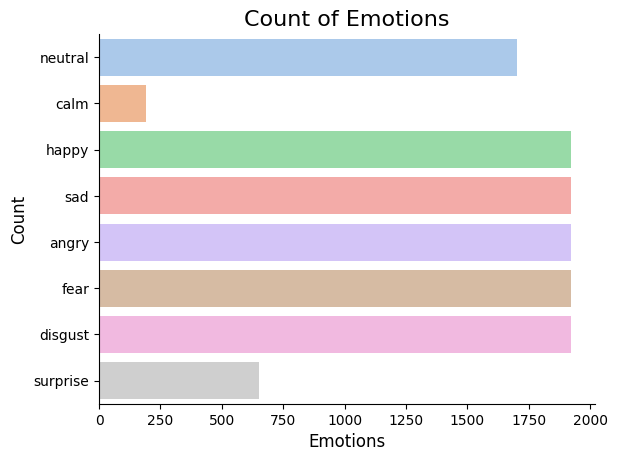

In [8]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions, palette="pastel")
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Data Preparation

In [9]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    X.append(path)
    Y.append(emotion)

len(X), len(Y), data_path.Path.shape

(12162, 12162, (12162,))

In [10]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
len(x_train), len(y_train), len(x_test), len(y_test)

(9121, 9121, 3041, 3041)

In [11]:
x_train, y_train

(['./datasets/Crema/1085_IEO_HAP_MD.wav',
  './datasets/Crema/1026_IWW_DIS_XX.wav',
  './datasets/Tess/YAF_angry/YAF_bath_angry.wav',
  './datasets/Crema/1065_MTI_SAD_XX.wav',
  './datasets/Ravdess/Actor_14/03-01-02-01-01-02-14.wav',
  './datasets/Crema/1072_IWW_HAP_XX.wav',
  './datasets/Tess/YAF_fear/YAF_ring_fear.wav',
  './datasets/Crema/1006_IWL_NEU_XX.wav',
  './datasets/Crema/1070_IEO_HAP_HI.wav',
  './datasets/Crema/1034_IEO_FEA_HI.wav',
  './datasets/Crema/1068_MTI_DIS_XX.wav',
  './datasets/Tess/OAF_Fear/OAF_gun_fear.wav',
  './datasets/Crema/1050_IWW_SAD_XX.wav',
  './datasets/Crema/1017_IEO_SAD_LO.wav',
  './datasets/Crema/1085_TAI_HAP_XX.wav',
  './datasets/Crema/1023_TIE_FEA_XX.wav',
  './datasets/Crema/1058_ITS_SAD_XX.wav',
  './datasets/Crema/1055_IEO_HAP_HI.wav',
  './datasets/Crema/1057_ITH_NEU_XX.wav',
  './datasets/Crema/1089_ITS_FEA_XX.wav',
  './datasets/Crema/1077_ITH_HAP_XX.wav',
  './datasets/Tess/OAF_Fear/OAF_long_fear.wav',
  './datasets/Crema/1015_ITH_HAP_XX

### Save Test and Train set data

In [12]:
x_test_df = pd.DataFrame(x_test, columns=["Path"])
y_test_df = pd.DataFrame(y_test, columns=["Emotion"])
test_df = pd.concat([x_test_df, y_test_df], axis=1)
test_df.to_excel("./datasets/test_dataset.xlsx", index=False)


In [13]:
x_train_df = pd.DataFrame(x_train, columns=["Path"])
y_train_df = pd.DataFrame(y_train, columns=["Emotion"])
train_df = pd.concat([x_train_df, y_train_df], axis=1)
train_df.to_excel("./datasets/train_dataset.xlsx", index=False)